# **Quantum Bit (Qubit)**
***

## What is a Qubit?
Let's first consider a single classical bit. It has only two possible states 0 and 1 and it is the smallest unit of classical information. A qubit (Quantum Bit) is a somewhat similar concept to a bit; it is the basic structure of quantum information and when **measured**, it can be in state 0 or 1. The main difference is that, before measurement, quantum mechanics allows qubit to be in the superpositon of states 0 and 1. 

These states are  form a two-dimensional vector space  and are typically written in *Dirac notation* as $|0\rangle$ and $|1\rangle$, which is short for:

$\begin{equation}
    |0\rangle = \begin{pmatrix} 1 \\0 \end{pmatrix} \text{ and } |1\rangle = \begin{pmatrix} 0 \\1 \end{pmatrix} .
\end{equation}$

Let $|\psi\rangle$ be a qubit state, which is a superposition of states $|0\rangle$ and $|1\rangle$ and can be written as:

$\begin{equation}
    |\psi\rangle = \alpha |0\rangle + \beta |1\rangle,
\end{equation}$
where $\alpha$, $\beta$ $\in \mathbb{C}$ called **amplitudes** in quantum mechanics. 
The equation above tell us that the result of measuring qubit could be state $|0\rangle$ with probability of $|\alpha|^2$ or state $|1\rangle$ with probability of $|\beta|^2$. Since measurement outcomes are probabilistic and mutually exclusive, these probabilities must sum to 1:
$$|\alpha|^2 + |\beta|^2 = 1 .$$

A qubit can exist in any possible combination (or superposiiton) of $|0\rangle$ and $|1\rangle$  until it is measured. The act of measurement in quantum mechanics is special - it causes the superposed state to collapse, and the only possible outcomes are $|0\rangle$ or $|1\rangle$.

As an example consider the following qubit state:
$$
    |\psi\rangle = \frac{1}{2} |0\rangle + \frac{\sqrt{3}}{2} |1\rangle .
$$

For this state, the probability of measuring $|0\rangle$ is:

$$
\left|\frac{1}{2}\right|^2 = \frac{1}{4},
$$
and the probability of measuring $|1\rangle$ is:
$$
\left| \frac{\sqrt{3}}{2}\right| ^2 = \frac{3}{4} .
$$





## Bloch sphere representation of Qubit

We can rewrite equation (1) as:
$\begin{equation}
|\psi\rangle = e^{i\gamma}\left(\cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle \right),
\end{equation}$
where $\gamma , \theta$, $\psi$ $\in \mathbb{R}$. For a single qubit, the **global phase** $e^{i\gamma}$ has no observable effects, so it can be omitted. This gives us:
$\begin{equation}
|\psi\rangle = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle . 
\end{equation}$ Here, the **relative phase** $e^{i\phi}$ is physically significant and cannot be removed.


The **Bloch Sphere** is a unit sphere which is a geometrical representation of a qubit. The north and south poles  correspond to the orthonormal basis states $|0\rangle$ and $|1\rangle$. The angles $\theta$ and $\phi$ define a unique point on the surface of the sphere, representing the qubit's state.

The Bloch Sphere representation is especially useful for visualizing qubit states and understanding how **quantum gates** transform them.
***


Below is a simple Python script that visalizes a  qubit on the Bloch sphere, along with the basis state vectors vectors $|0\rangle$ and $|1\rangle$. Feel free to experiment with it and modify the parameters!

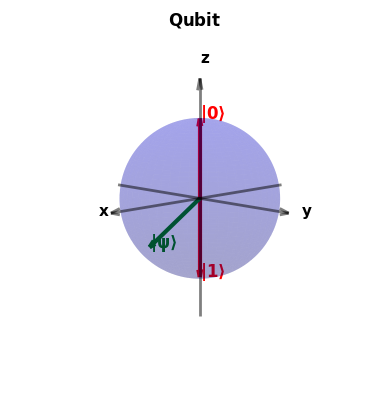

In [2]:
import numpy as np
import matplotlib.pyplot as plt



class BlochSphere:
    
    def __init__(self):
        self.radius = 1
        self.qubit_origin = np.array([0, 0, 0])
        self.fig = plt.figure('Qubit')
        self.axes = plt.axes(projection = '3d')
    
    def draw_axis(self, start_point, end_point,label, label_coordinates):
        """Draws a single axis (x, y, or z) with a label."""
        self.axes.quiver(start_point[0], start_point[1], start_point[2],
                        end_point[0], end_point[1], end_point[2],
                        color='black', lw = 2, arrow_length_ratio = 1/20, alpha = 0.5)
        
        self.axes.text(label_coordinates[0], label_coordinates[1], label_coordinates[2],f'$\\mathbf{{{label}}}$', color='black', fontsize=11)


    def setup_figure(self):
        """Sets basic 3D plot settings."""
        self.axes.set_axis_off()
        self.axes.set_title('$\mathbf{Qubit}$')
        self.axes.view_init(10,45)
        
    
    def draw_sphere(self):
        """Draws the Bloch sphere surface and coordinate axes."""
        self.setup_figure()
        
        # Draw coordinate axes
        self.draw_axis(np.array([-1.5*self.radius, 0, 0]), np.array([3*self.radius, 0, 0]), label='x', label_coordinates=np.array([1.7*self.radius, 0, 0]))
        self.draw_axis(np.array([0, -1.5*self.radius, 0]), np.array([0, 3*self.radius, 0]), label='y', label_coordinates=np.array([0, 1.7*self.radius, 0]))
        self.draw_axis(np.array([0,0, -1.5*self.radius]), np.array([0,0, 3*self.radius]), label='z', label_coordinates=np.array([0, 0, 1.7*self.radius]))
        
        # Generate Bloch sphere mesh
        theta, phi = np.meshgrid(np.linspace(0,np.pi,100), np.linspace(0,2*np.pi,100))
        X = self.radius * np.sin(theta) * np.cos(phi)
        Y = self.radius* np.sin(theta) * np.sin(phi)
        Z = self.radius * np.cos(theta)
        
        self.axes.plot_surface(X,Y,Z , color = 'blue', alpha = 0.2)  
        self.axes.set_aspect('equal')

    def draw_vector(self, state_vector, label = '\\psi', color='red'):
        """Draws a qubit state vector on the Bloch sphere. 
        The state is assumed to be a 2D complex vector."""
     
        # Normalize the state vector
        state_vector = state_vector / np.linalg.norm(state_vector)
        
        # Convert to Bloch sphere coordinates using theta, phi
        theta = np.real(2*np.arccos(state_vector[0]))
        if theta != 0:
            phi = np.angle(state_vector[1] / np.sin(theta/2))
        else:
            phi = 0

        # Spherical to Cartesian
        x =  self.radius * np.sin(theta) *np.cos(phi)
        y = self.radius * np.sin(theta) * np.sin(phi)
        z = self.radius * np.cos(theta) 
        
        # Draw vector and add a label
        self.axes.quiver(self.qubit_origin[0], self.qubit_origin[1], self.qubit_origin[2],
                        x, y, z,
                        color = color, arrow_length_ratio=1/10, lw=3)
        
        self.axes.text(x, y, z, f'$\\mathbf{{|{label}\\rangle}}$',
                        color = color, fontsize=12)

               

def main():
    qubit = BlochSphere()
    qubit.draw_sphere()

    # Draw basis states
    qubit.draw_vector(np.array([1,0]),label=0)
    qubit.draw_vector(np.array([0,1]),label=1)
    
    # Example: Superposition state from earlier text
    qubit.draw_vector(np.array([1/2,np.sqrt(3)/2]), color='green')
    
    plt.show()
if __name__ == '__main__':
    main()


## Summary

- A qubit is the fundamental unit of quantum information. It can exist  in the state $|0\rangle$, $|1\rangle$, or in a superpositon of these two basis states. During  measurement, the superposed state vector collapses to either $|0\rangle$ with probability $\left|\alpha \right|^2$ or $|1\rangle$ with probability $\left|\beta \right|^2$.

- A qubit can be represented on the **Bloch sphere** which provides a  useful geometric visualization of its states.